In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Exploración de datos

In [704]:
raw_data = pd.read_csv('vehicle_prices.csv')

In [689]:
raw_data.info

<bound method DataFrame.info of             model  year  price transmission  mileage fuelType    tax   mpg  \
0           Corsa  2018   7885       Manual     9876   Petrol  145.0  55.4   
1           Corsa  2019  11995       Manual     2500   Petrol  145.0  54.3   
2           Corsa  2017   9777    Automatic     9625   Petrol  145.0  47.9   
3           Corsa  2016   8500       Manual    25796   Petrol   30.0  55.4   
4           Corsa  2019  10000       Manual     3887   Petrol  145.0  43.5   
...           ...   ...    ...          ...      ...      ...    ...   ...   
108535    C Class  2020  35999    Automatic      500   Diesel  145.0  55.4   
108536    B Class  2020  24699    Automatic     2500   Diesel  145.0  55.4   
108537  GLC Class  2019  30999    Automatic    11612   Diesel  145.0  41.5   
108538  CLS Class  2019  37990    Automatic     2426   Diesel  145.0  45.6   
108539    S Class  2019  54999    Automatic     2075   Diesel  145.0  52.3   

        engineSize      make  


In [690]:
raw_data.describe()

,year,price,mileage,tax,mpg,engineSize
count,108540.000000,108540.000000,108540.000000,99187.000000,99187.000000,108540.000000
mean,2017.098028,16890.124046,23025.928469,120.299838,55.166825,1.661644
std,2.130057,9756.266820,21176.423684,63.150926,16.138522,0.557058
min,1970.000000,450.000000,1.000000,0.000000,0.300000,0.000000
25%,2016.000000,10229.500000,7491.750000,125.000000,47.100000,1.200000
50%,2017.000000,14698.000000,17265.000000,145.000000,54.300000,1.600000
75%,2019.000000,20940.000000,32236.000000,145.000000,62.800000,2.000000
max,2060.000000,159999.000000,323000.000000,580.000000,470.800000,6.600000


In [691]:
raw_data.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make
0,Corsa,2018,7885,Manual,9876,Petrol,145.0,55.4,1.4,vauxhall
1,Corsa,2019,11995,Manual,2500,Petrol,145.0,54.3,1.4,vauxhall
2,Corsa,2017,9777,Automatic,9625,Petrol,145.0,47.9,1.4,vauxhall
3,Corsa,2016,8500,Manual,25796,Petrol,30.0,55.4,1.4,vauxhall
4,Corsa,2019,10000,Manual,3887,Petrol,145.0,43.5,1.4,vauxhall


In [692]:
raw_data.isna().sum()

model              0
year               0
price              0
transmission       0
mileage            0
fuelType           0
tax             9353
mpg             9353
engineSize         0
make               0
dtype: int64

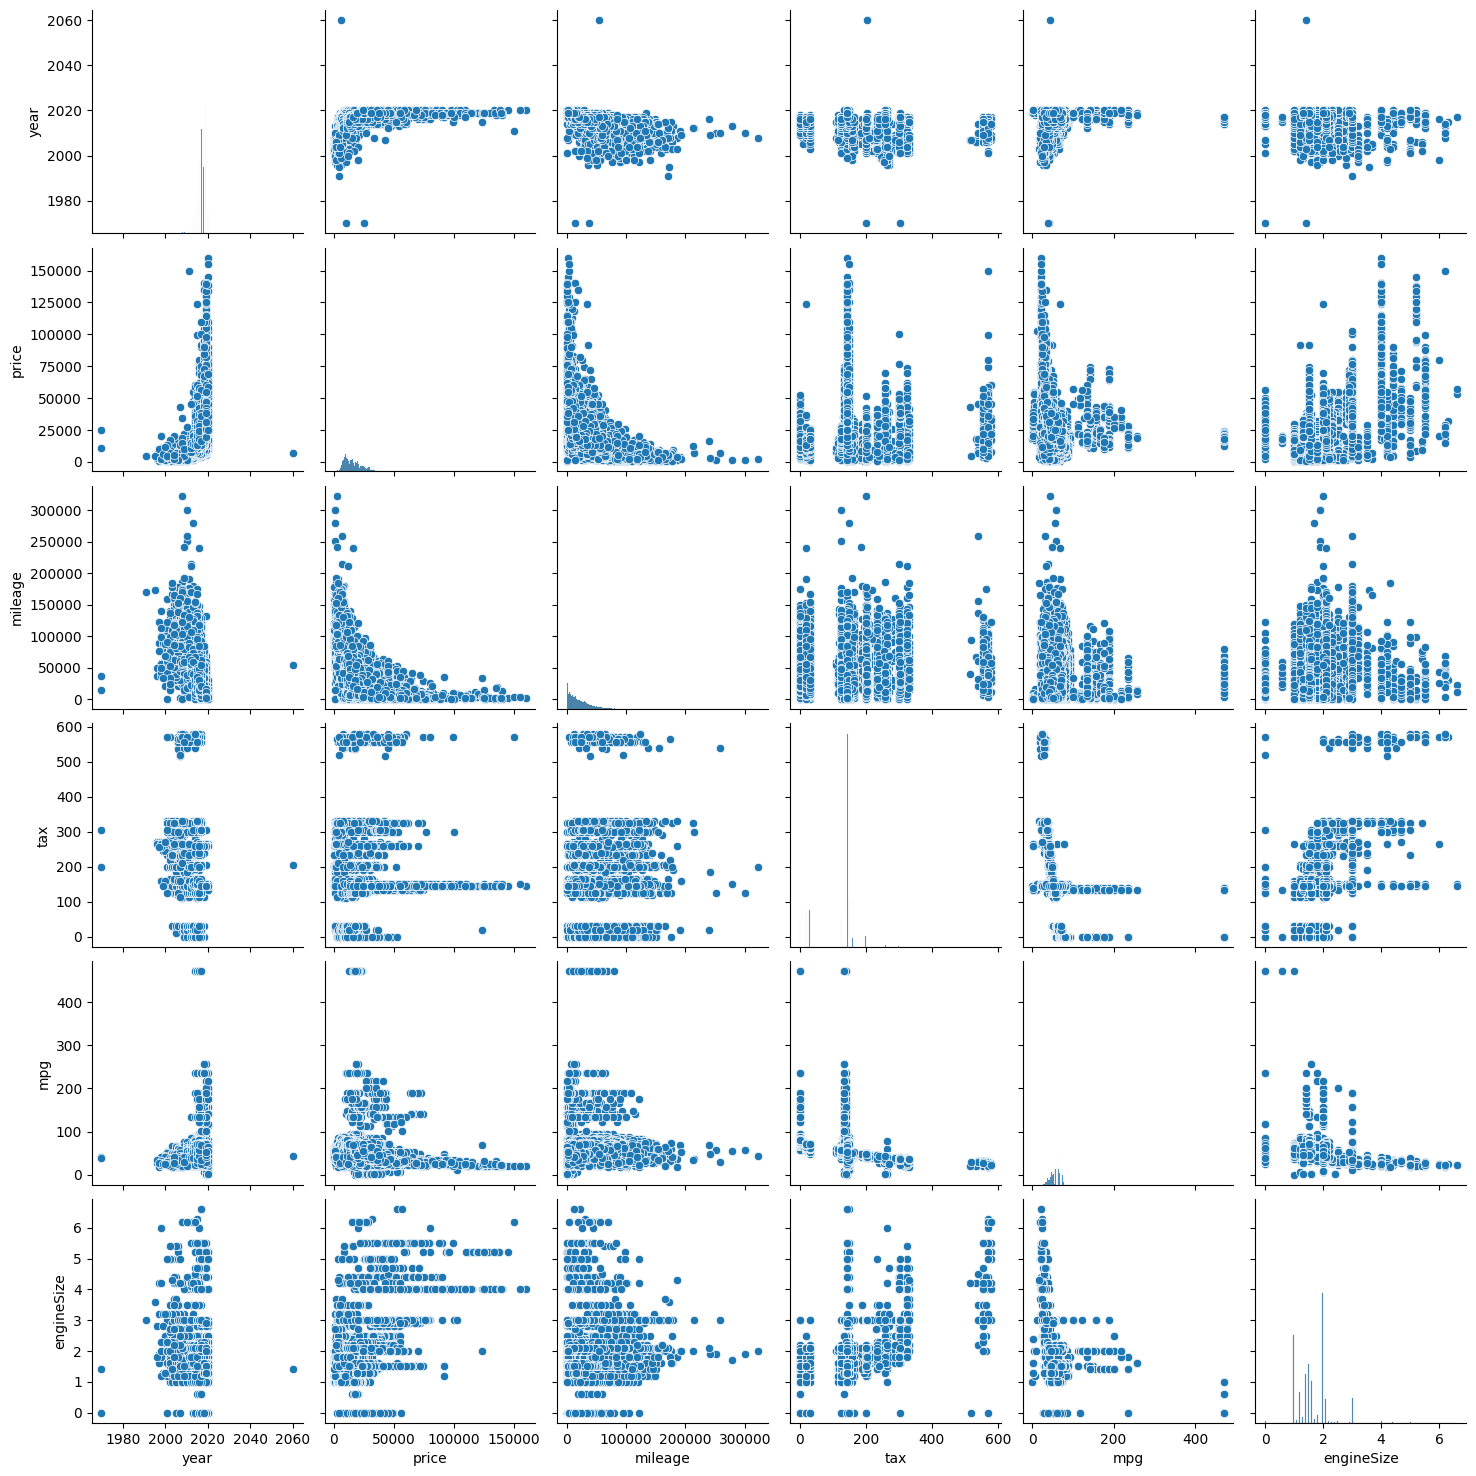

In [709]:
sns.pairplot(raw_data)
plt.savefig('pairplot.png')

/Users/juanelgueta/used-vehicle-price-prediction/venv/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


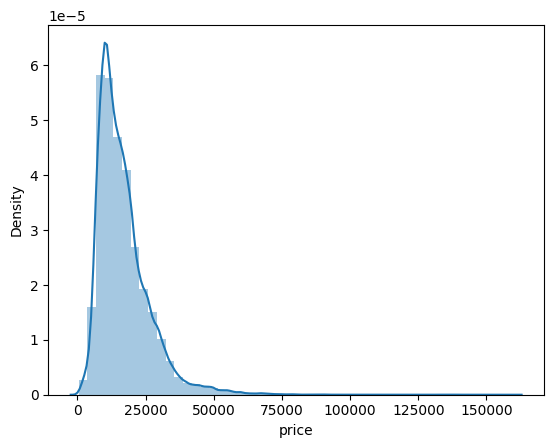

In [711]:
sns.distplot(raw_data['price'])
plt.savefig('distribution_prices.png')


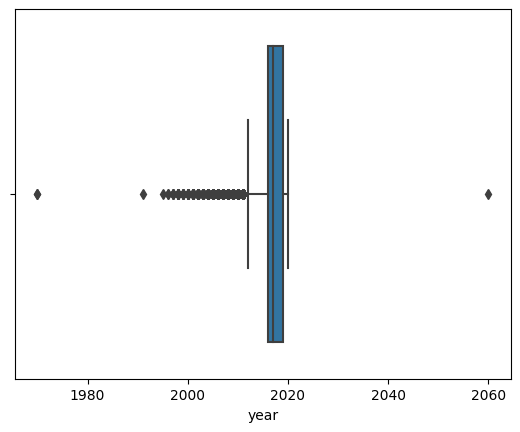

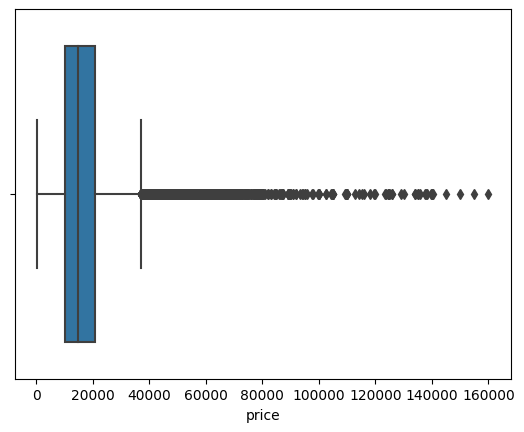

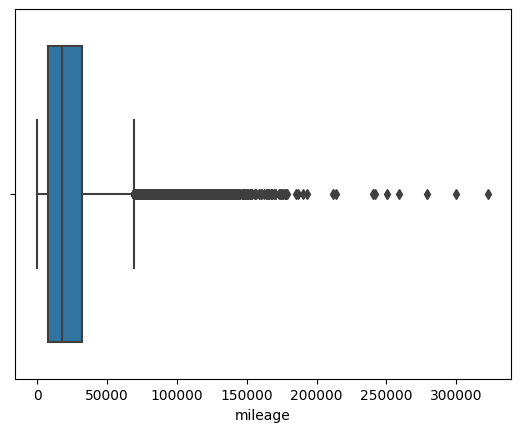

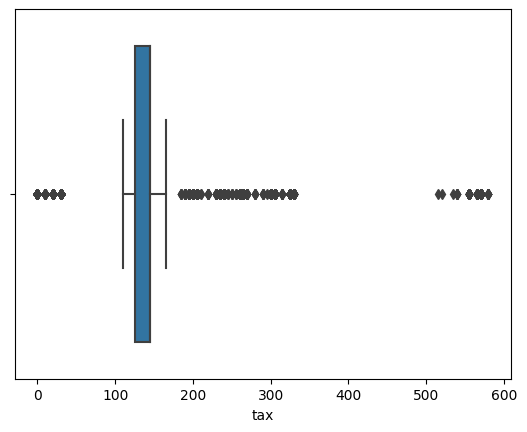

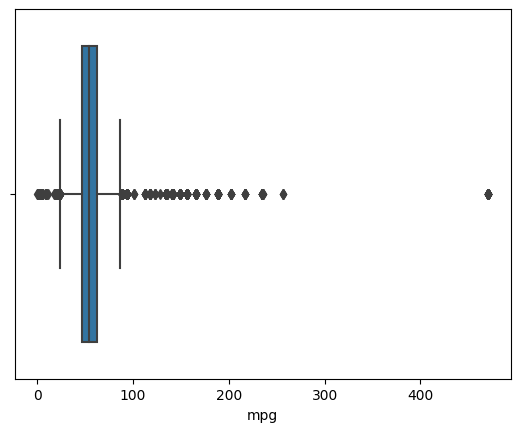

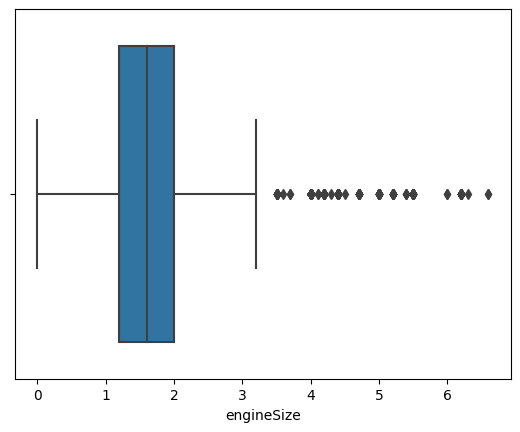

In [705]:
for col in raw_data.select_dtypes(include=['number']):
    sns.boxplot(x=col, data=raw_data)
    plt.savefig(f'{col}_boxplot.png')
    plt.show()

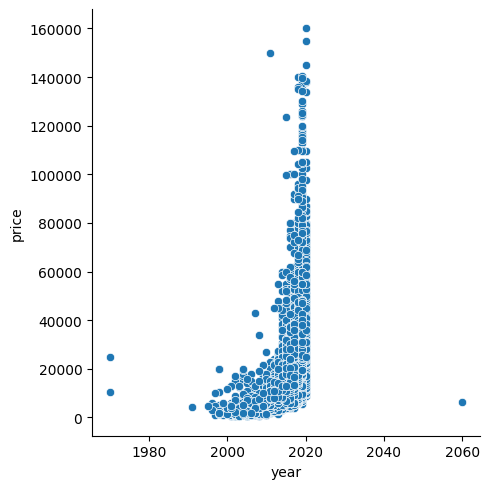

In [696]:
sns.relplot(x="year", y="price", data=raw_data)

In [706]:
raw_data[raw_data['year']==2060]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make
79562,Fiesta,2060,6495,Automatic,54807,Petrol,205.0,42.8,1.4,ford


In [708]:
raw_data[raw_data['model']=='Fiesta']

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make
61836,Fiesta,2017,12000,Automatic,15944,Petrol,150.0,57.7,1.0,ford
61839,Fiesta,2019,17500,Manual,10460,Petrol,145.0,40.3,1.5,ford
61840,Fiesta,2019,16500,Automatic,1482,Petrol,145.0,48.7,1.0,ford
61841,Fiesta,2015,10500,Manual,35432,Petrol,145.0,47.9,1.6,ford
61843,Fiesta,2017,9000,Manual,13054,Petrol,145.0,54.3,1.2,ford
...,...,...,...,...,...,...,...,...,...,...
79781,Fiesta,2019,15999,Manual,2813,Petrol,145.0,58.9,1.0,ford
79782,Fiesta,2015,8999,Manual,24546,Petrol,0.0,65.7,1.0,ford
79788,Fiesta,2017,9899,Automatic,16303,Petrol,0.0,57.7,1.0,ford
79791,Fiesta,2018,12500,Automatic,7047,Petrol,145.0,48.7,1.0,ford


In [712]:
raw_data['log_price'] = np.log(raw_data['price'])

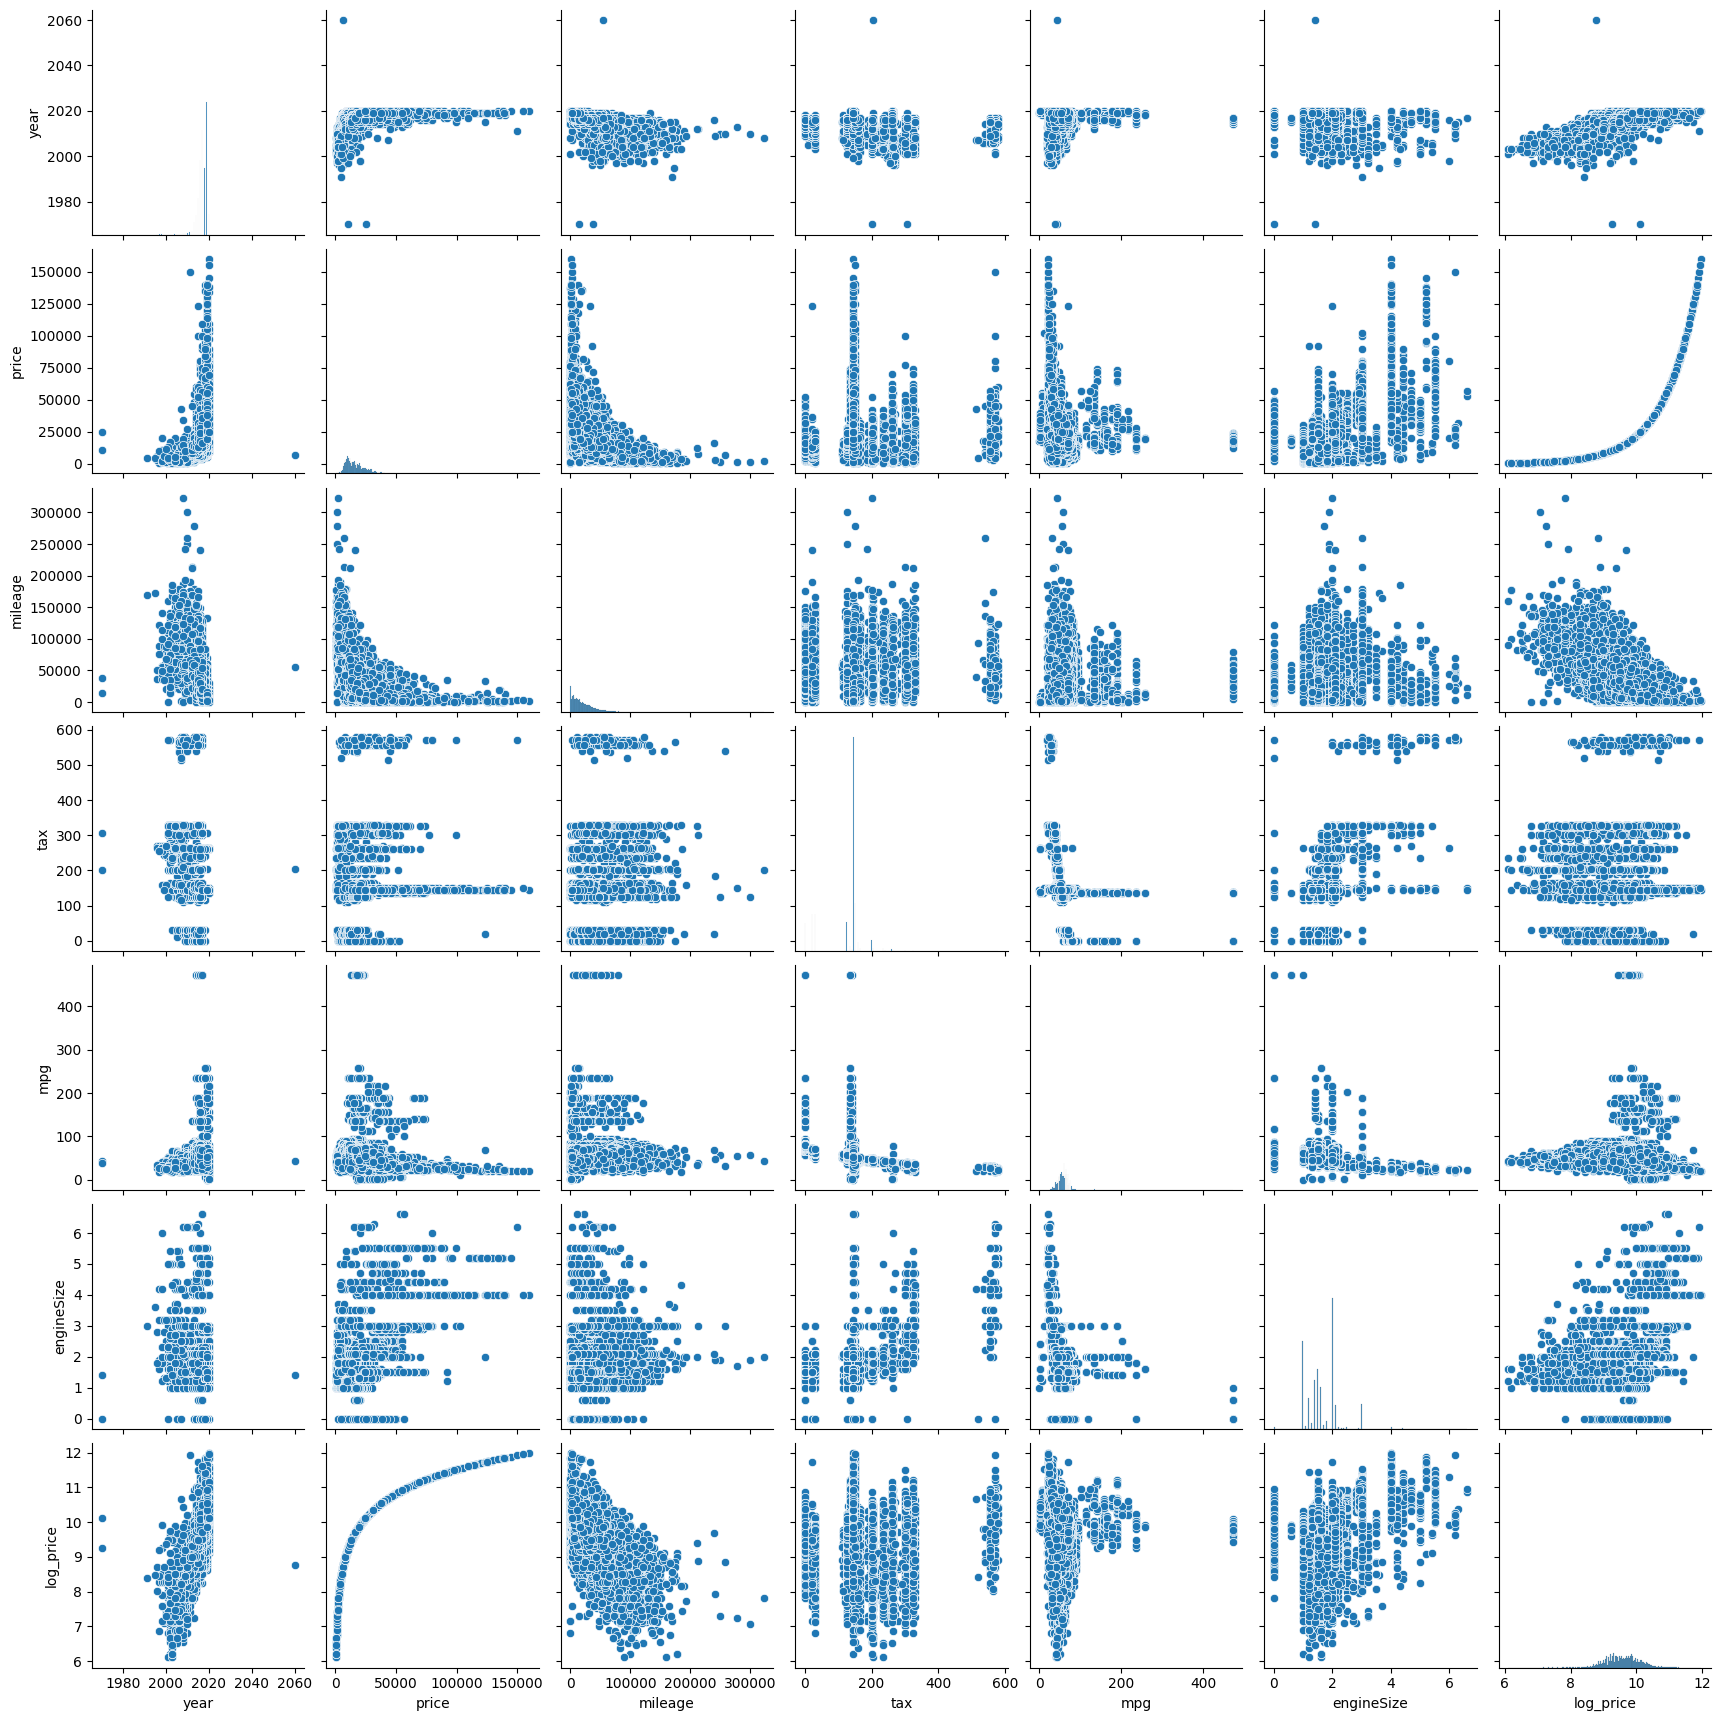

In [713]:
sns.pairplot(raw_data)
plt.savefig('pairplot_normal.png')

In [701]:
raw_data.iloc[raw_data['price'].idxmax()]

model             B Class
year                 2019
price               22890
transmission    Semi-Auto
mileage             12250
fuelType           Diesel
tax                 145.0
mpg                  55.4
engineSize            2.0
make             mercedes
age                     3
log_price       10.038455
Name: 101621, dtype: object

In [702]:
raw_numeric = raw_data.select_dtypes(include='number')
raw_categorical = raw_data.select_dtypes(exclude='number')

In [9]:
raw_numeric

,year,price,mileage,tax,mpg,engineSize
0,2018,7885,9876,145.0,55.4,1.4
1,2019,11995,2500,145.0,54.3,1.4
2,2017,9777,9625,145.0,47.9,1.4
3,2016,8500,25796,30.0,55.4,1.4
4,2019,10000,3887,145.0,43.5,1.4
...,...,...,...,...,...,...
108535,2020,35999,500,145.0,55.4,2.0
108536,2020,24699,2500,145.0,55.4,2.0
108537,2019,30999,11612,145.0,41.5,2.1
108538,2019,37990,2426,145.0,45.6,2.0


<AxesSubplot:>

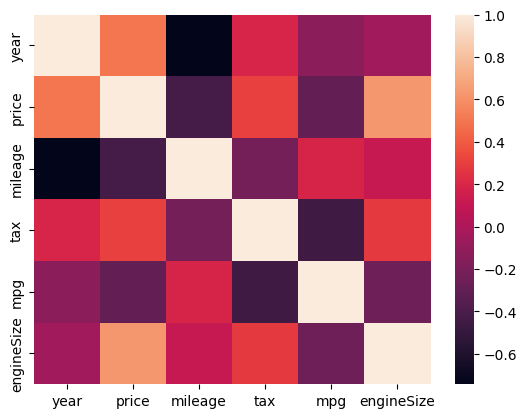

In [11]:
sns.heatmap(raw_numeric.corr())

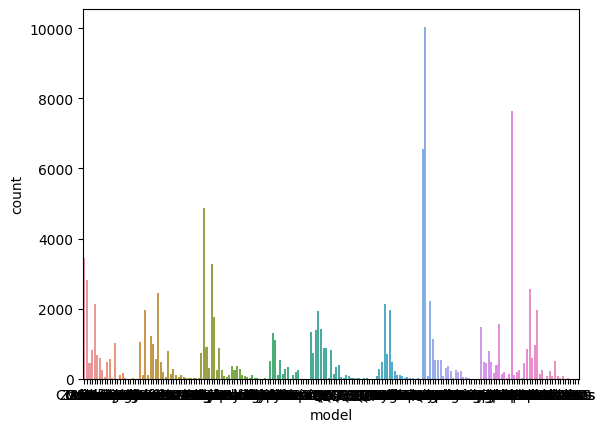

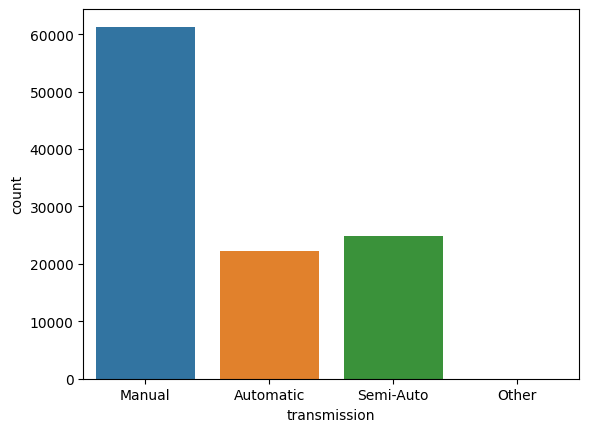

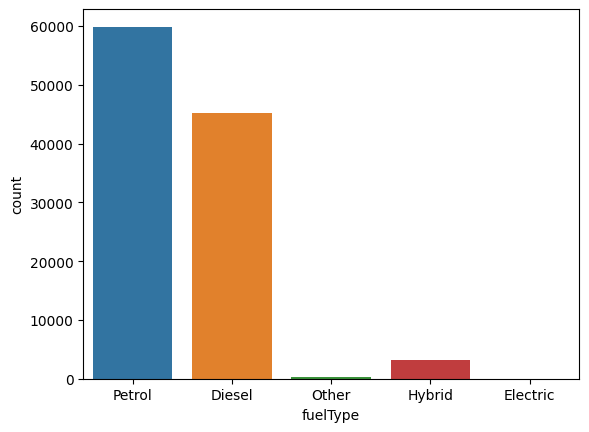

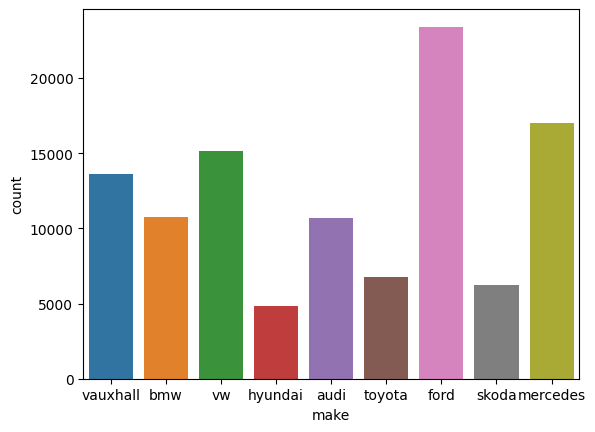

In [17]:
for col in raw_categorical:
    sns.countplot(x=col, data=raw_categorical)
    plt.show()

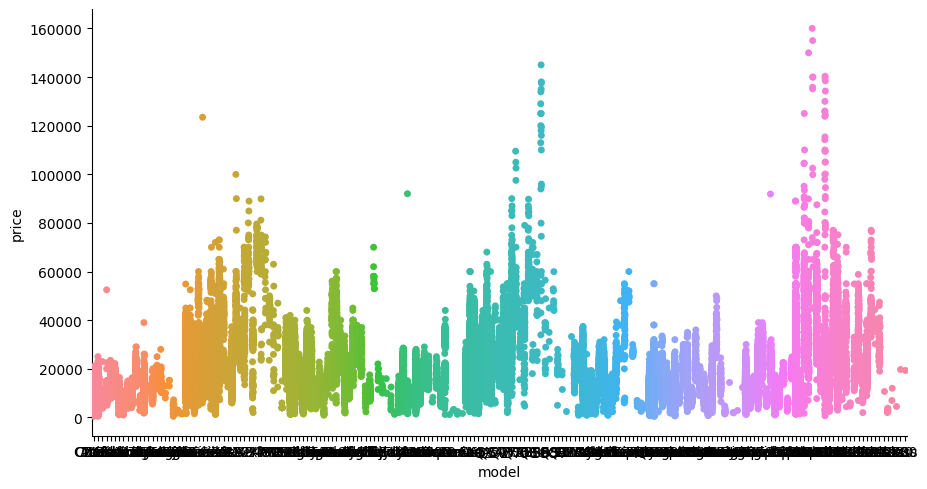

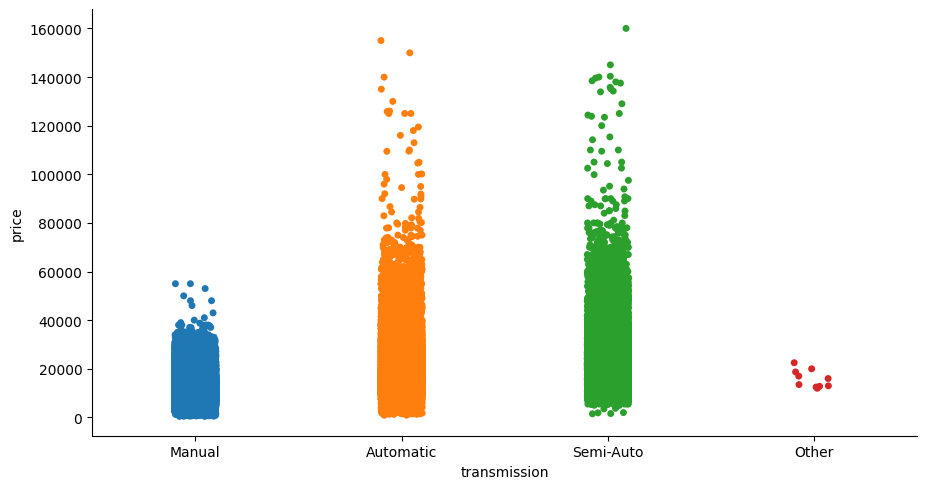

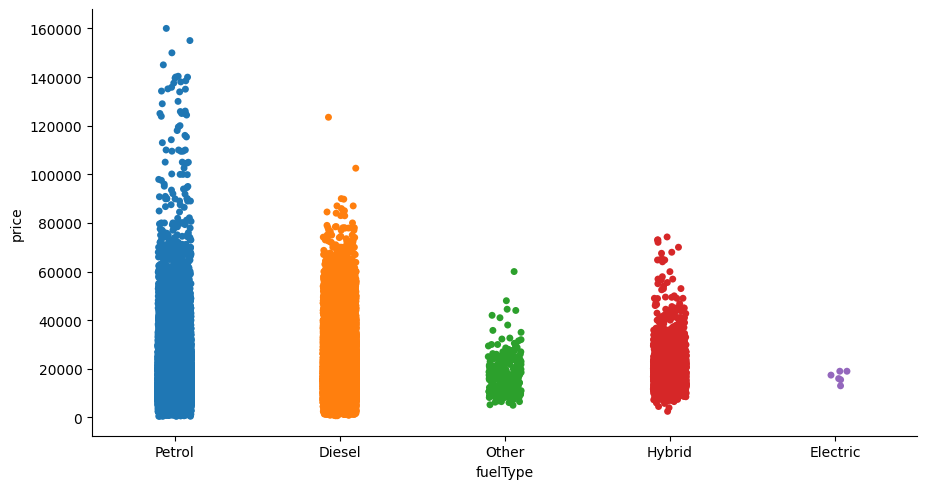

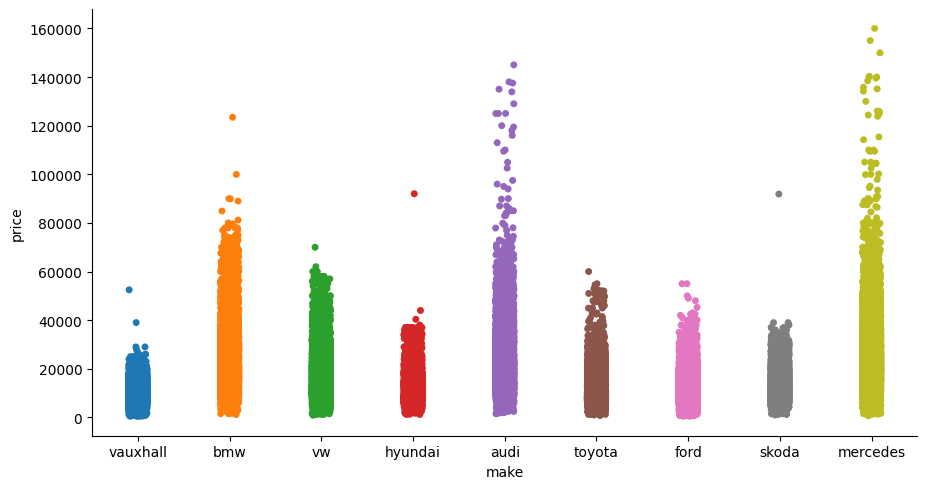

In [56]:
for col in raw_categorical:
    sns.catplot(x=col, y="price", data=raw_data, aspect=15/8)
    plt.show()

In [19]:
unique_models = raw_categorical['model'].unique()

In [20]:
unique_models

array(['Corsa', 'Astra', 'Viva', 'Mokka', 'Mokka X', 'Crossland X',
       'Zafira', 'Meriva', 'Zafira Tourer', 'Adam', 'Grandland X',
       'Antara', 'Insignia', 'Ampera', 'GTC', 'Combo Life', 'Vivaro',
       'Cascada', 'Kadjar', 'Agila', 'Tigra', 'Vectra', '5 Series',
       '6 Series', '1 Series', '7 Series', '2 Series', '4 Series', 'X3',
       '3 Series', 'X5', 'X4', 'i3', 'X1', 'M4', 'X2', 'X6', '8 Series',
       'Z4', 'X7', 'M5', 'i8', 'M2', 'M3', 'M6', 'Z3', 'T-Roc', 'Golf',
       'Passat', 'T-Cross', 'Polo', 'Tiguan', 'Sharan', 'Up', 'Scirocco',
       'Beetle', 'Caddy Maxi Life', 'Caravelle', 'Touareg', 'Arteon',
       'Touran', 'Golf SV', 'Amarok', 'Tiguan Allspace', 'Shuttle',
       'Jetta', 'CC', 'California', 'Caddy Life', 'Caddy', 'Caddy Maxi',
       'Eos', 'Fox', 'I20', 'Tucson', 'I10', 'IX35', 'I30', 'I40',
       'Ioniq', 'Kona', 'Veloster', 'I800', 'IX20', 'Santa Fe', 'Accent',
       'Terracan', 'Getz', 'Amica', 'A1', 'A6', 'A4', 'A3', 'Q3', 'Q5',
       'A5'

In [21]:
len(unique_models)

195

In [35]:
grouped_by_model = raw_data[['model', 'price']].groupby(['model'], as_index=False).mean()

In [36]:
grouped_by_model

,model,price
0,1 Series,15821.670391
1,180,10799.000000
2,2 Series,19539.371847
3,200,19495.000000
4,220,19995.000000
...,...,...
190,Z4,27001.935185
191,Zafira,10029.444073
192,Zafira Tourer,10468.241379
193,i3,18667.116279


In [37]:
grouped_by_model.iloc[grouped_by_model['price'].idxmax()]

model    G Class
price    98934.2
Name: 68, dtype: object

In [38]:
grouped_by_model.iloc[grouped_by_model['price'].idxmin()]

model    Accent
price    1295.0
Name: 21, dtype: object

In [44]:
for col in raw_numeric:
    print(f'{col}------------------------------')
    print(raw_data.iloc[raw_data[col].idxmax()])
    print('\n')


year------------------------------
model              Fiesta
year                 2060
price                6495
transmission    Automatic
mileage             54807
fuelType           Petrol
tax                 205.0
mpg                  42.8
engineSize            1.4
make                 ford
Name: 79562, dtype: object


price------------------------------
model             G Class
year                 2020
price              159999
transmission    Semi-Auto
mileage              1350
fuelType           Petrol
tax                 145.0
mpg                  21.4
engineSize            4.0
make             mercedes
Name: 101620, dtype: object


mileage------------------------------
model               A6
year              2008
price             2490
transmission    Manual
mileage         323000
fuelType        Diesel
tax              200.0
mpg               44.1
engineSize         2.0
make              audi
Name: 54252, dtype: object


tax------------------------------
model              

In [52]:
raw_data[raw_data['mpg']>400]

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make
13664,i3,2016,17100,Automatic,25269,Other,0.0,470.8,0.6,bmw
14253,i3,2017,19998,Automatic,41949,Hybrid,140.0,470.8,0.0,bmw
14410,i3,2017,19998,Automatic,41146,Hybrid,0.0,470.8,0.0,bmw
14412,i3,2017,21898,Automatic,10839,Hybrid,0.0,470.8,0.0,bmw
15498,i3,2017,19980,Automatic,26965,Hybrid,140.0,470.8,0.0,bmw
15984,i3,2016,19490,Automatic,8421,Hybrid,0.0,470.8,0.0,bmw
16909,i3,2016,16482,Automatic,43695,Hybrid,0.0,470.8,0.0,bmw
17260,i3,2015,14285,Automatic,65800,Hybrid,0.0,470.8,0.0,bmw
17545,i3,2017,18500,Automatic,36429,Hybrid,0.0,470.8,0.0,bmw
17732,i3,2017,19495,Automatic,17338,Hybrid,135.0,470.8,0.0,bmw


In [437]:
raw_data.query('fuelType in ["Electric","Other","Hybrid"]')['mpg'].mean()

89.17190033023115

In [432]:
all(raw_data.query('model == "i3"') == raw_data[raw_data['mpg']>400])

True

## Explore data with nulls to choose imputation strategy

In [231]:
all(raw_data['tax'].isna()==raw_data['mpg'].isna())

True

In [232]:
nulls = raw_data[raw_data['tax'].isna()==True]

In [233]:
nulls.describe()

,year,price,mileage,tax,mpg,engineSize
count,9353.000000,9353.000000,9353.000000,0.0,0.0,9353.000000
mean,2017.207313,17789.163477,22676.120175,NaN,NaN,1.644285
std,2.191071,8444.630871,21468.093434,NaN,NaN,0.550505
min,1991.000000,495.000000,1.000000,NaN,NaN,0.000000
25%,2016.000000,11950.000000,7978.000000,NaN,NaN,1.000000
50%,2018.000000,16498.000000,15252.000000,NaN,NaN,1.600000
75%,2019.000000,21495.000000,30923.000000,NaN,NaN,2.000000
max,2020.000000,88995.000000,177644.000000,NaN,NaN,6.200000


In [714]:
nulls = raw_data[raw_data['tax'].isna()==True]
nulls.select_dtypes(exclude='number')['model'].unique()

array(['Focus', 'C Class'], dtype=object)

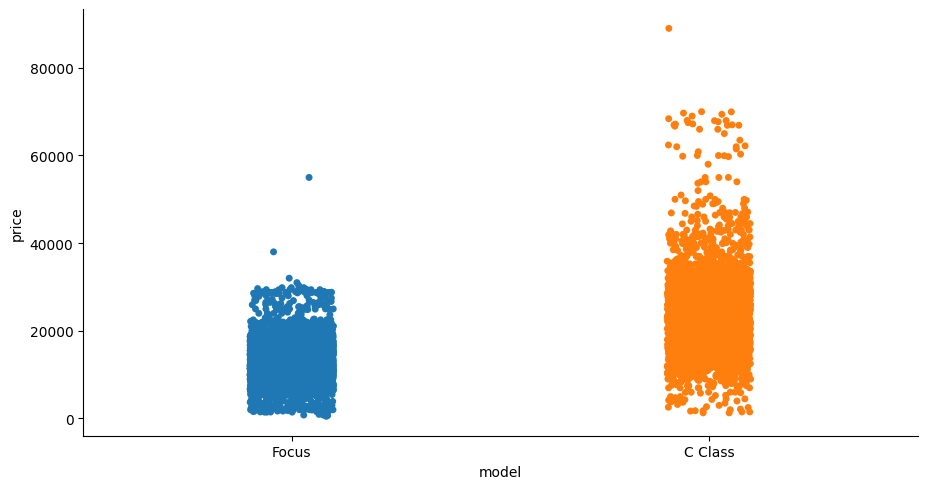

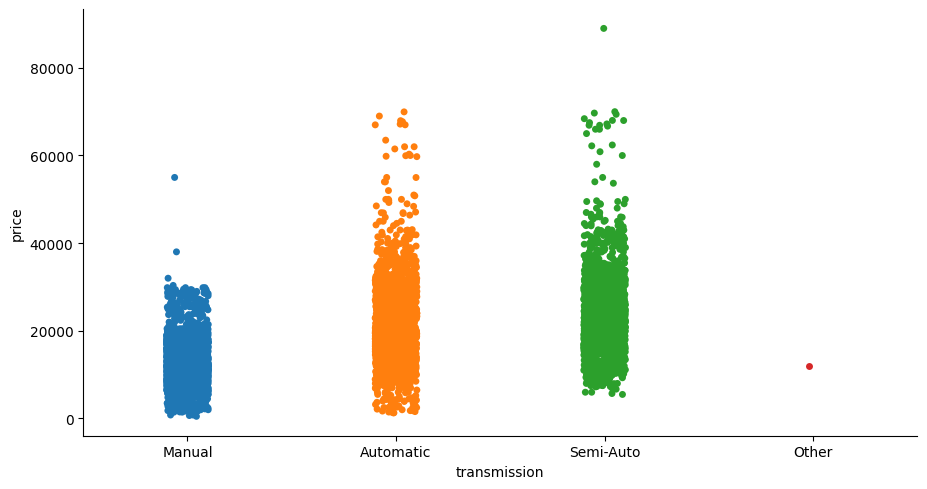

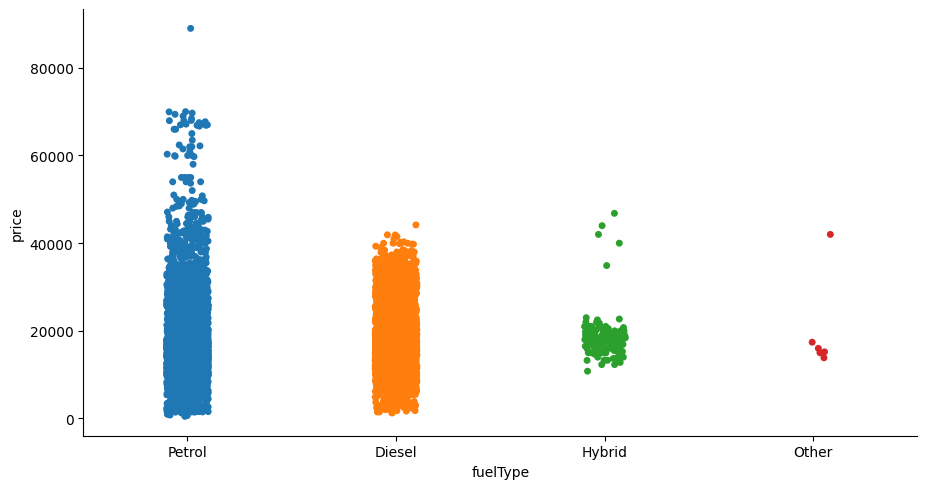

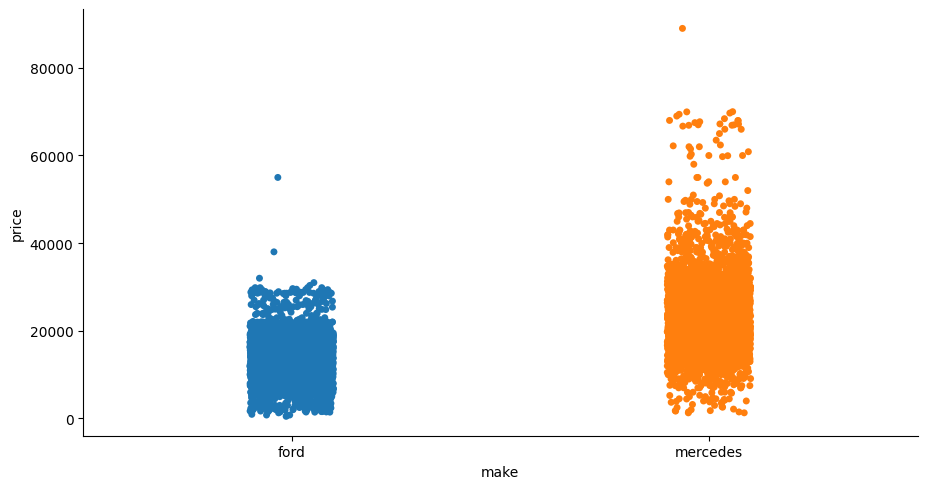

In [235]:
for col in nulls.select_dtypes(exclude='number'):
    sns.catplot(x=col, y="price", data=nulls, aspect=15/8)
    plt.show()

In [254]:
models = raw_data.query('model in ["Focus","C Class"]')

In [255]:
models

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make
61837,Focus,2018,14000,Manual,9083,Petrol,150.0,57.7,1.0,ford
61838,Focus,2017,13000,Manual,12456,Petrol,150.0,57.7,1.0,ford
61845,Focus,2018,10000,Manual,48141,Petrol,145.0,61.4,1.0,ford
61861,Focus,2017,18499,Manual,13063,Petrol,145.0,41.5,2.0,ford
61868,Focus,2019,18990,Manual,8400,Petrol,145.0,60.1,1.0,ford
...,...,...,...,...,...,...,...,...,...,...
108527,C Class,2019,27999,Automatic,6537,Petrol,145.0,44.1,2.0,mercedes
108528,C Class,2019,24999,Automatic,6064,Diesel,145.0,61.4,2.0,mercedes
108533,C Class,2019,30399,Automatic,5000,Diesel,145.0,61.4,2.0,mercedes
108534,C Class,2020,30999,Automatic,1000,Diesel,145.0,64.2,2.0,mercedes


In [238]:
models = raw_data.query('model in ["Focus","C Class"]')
models.describe()

,year,price,mileage,tax,mpg,engineSize
count,17688.000000,17688.000000,17688.000000,8335.000000,8335.000000,17688.000000
mean,2017.193012,17846.399989,22841.196744,114.415117,58.648014,1.652719
std,2.134467,8493.375417,21415.049294,63.488333,13.653747,0.549098
min,1991.000000,495.000000,1.000000,0.000000,23.000000,0.000000
25%,2016.000000,11896.750000,8011.000000,30.000000,50.400000,1.000000
50%,2018.000000,16499.000000,15623.000000,145.000000,60.100000,1.600000
75%,2019.000000,21800.000000,31246.750000,145.000000,64.200000,2.000000
max,2020.000000,88995.000000,177644.000000,580.000000,217.300000,6.200000


In [251]:
c_class = raw_data.query('model == "C Class"')
c_class.describe()

,year,price,mileage,tax,mpg,engineSize
count,7646.000000,7646.00000,7646.000000,3747.000000,3747.000000,7646.000000
mean,2017.367251,23684.84057,22279.462072,118.405391,56.883133,2.033992
std,2.117069,8864.65286,22481.301121,63.088864,16.371416,0.482721
min,1991.000000,1290.00000,1.000000,0.000000,23.000000,0.000000
25%,2016.000000,17699.00000,6001.000000,125.000000,46.300000,2.000000
50%,2018.000000,22995.00000,14584.500000,145.000000,57.700000,2.000000
75%,2019.000000,28896.00000,32038.750000,145.000000,64.200000,2.100000
max,2020.000000,88995.00000,173000.000000,580.000000,217.300000,6.200000


In [98]:
focus = raw_data.query('model == "Focus"')
focus.describe()

,year,price,mileage,tax,mpg,engineSize
count,10042.000000,10042.000000,10042.000000,4588.000000,4588.000000,10042.000000
mean,2017.060347,13400.999004,23268.902709,111.156277,60.089385,1.362418
std,2.138223,4638.690036,20557.013307,63.634199,10.733369,0.398380
min,2002.000000,495.000000,1.000000,0.000000,26.300000,0.000000
25%,2016.000000,10295.500000,9381.000000,20.000000,55.400000,1.000000
50%,2017.000000,13000.000000,16548.000000,145.000000,60.100000,1.500000
75%,2019.000000,16799.000000,30689.250000,145.000000,67.300000,1.600000
max,2020.000000,54995.000000,177644.000000,330.000000,83.100000,2.500000


In [649]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils.validation import check_is_fitted

class ByCategoryImputer(BaseEstimator, TransformerMixin):
    """
    Imputes empty values based on category of observation. 

    Parameters
    ----------
    category_col: str
        column on which to find categories by which to perform imputation
    target_cols: list[str]
        list of columns which contain empty values to be imputed
    strategy: str
        imputation strategy (mean, median, mode)

    Returns
    ----------
    X: array-like
        array with imputed values in the target column 
    """
    def __init__(self, category_col, target_cols, strategy):
        assert type(category_col) == str
        assert type(target_cols) == list
        assert all(type(s) == str for s in target_cols)
        assert strategy in ['mean','median','mode']

        self.category_col = category_col
        self.target_cols = target_cols
        self.strategy = strategy

    def fit(self, X,y=None):
       
            
        return self

    def transform(self,X, y=None):

        X = X.copy()

        self.categories_ = []
        for target in self.target_cols:
            nulls = X[X[target].isna()==True]

            categories = nulls[self.category_col].unique()

            self.categories_.append((target,categories))



        for target in self.target_cols:
            for _,categories in self.categories_:
                for cat in categories:
                    if self.strategy == 'mean':
                        category_strategy = X.query(f'{self.category_col} == "{cat}"')[target].mean()
                    if self.strategy == 'median':
                        category_strategy = X.query(f'{self.category_col} == "{cat}"')[target].median()
                    if self.strategy == 'mode':
                        category_strategy = X.query(f'{self.category_col} == "{cat}"')[target].mode()[0]

                    X.loc[X[target].isna(), target] = category_strategy
                
        return X


In [650]:
# test imputer
imputer = ByCategoryImputer( category_col='model',target_cols=['mpg','tax'],strategy='mean')

In [651]:
raw_data2 = pd.read_csv('vehicle_prices.csv')
raw_data2.isna().sum()

model              0
year               0
price              0
transmission       0
mileage            0
fuelType           0
tax             9353
mpg             9353
engineSize         0
make               0
dtype: int64

In [652]:
imputer.fit(X=raw_data2)

ByCategoryImputer(category_col='model', strategy='mean',
                  target_cols=['mpg', 'tax'])

In [653]:
imputer.fit_transform(X=raw_data2)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,make
0,Corsa,2018,7885,Manual,9876,Petrol,145.0,55.4,1.4,vauxhall
1,Corsa,2019,11995,Manual,2500,Petrol,145.0,54.3,1.4,vauxhall
2,Corsa,2017,9777,Automatic,9625,Petrol,145.0,47.9,1.4,vauxhall
3,Corsa,2016,8500,Manual,25796,Petrol,30.0,55.4,1.4,vauxhall
4,Corsa,2019,10000,Manual,3887,Petrol,145.0,43.5,1.4,vauxhall
...,...,...,...,...,...,...,...,...,...,...
108535,C Class,2020,35999,Automatic,500,Diesel,145.0,55.4,2.0,mercedes
108536,B Class,2020,24699,Automatic,2500,Diesel,145.0,55.4,2.0,mercedes
108537,GLC Class,2019,30999,Automatic,11612,Diesel,145.0,41.5,2.1,mercedes
108538,CLS Class,2019,37990,Automatic,2426,Diesel,145.0,45.6,2.0,mercedes


In [654]:
raw_data2.isna().sum()

model              0
year               0
price              0
transmission       0
mileage            0
fuelType           0
tax             9353
mpg             9353
engineSize         0
make               0
dtype: int64

# Pipelines

In [655]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import FunctionTransformer, StandardScaler, OneHotEncoder
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV

In [656]:
import datetime

def eliminate_year_outlier(X):
    return X[X['year']<datetime.datetime.now().year]

raw_data = raw_data = pd.read_csv('vehicle_prices.csv')

raw_data = eliminate_year_outlier(raw_data)

raw_data.loc[raw_data['model']== 'i3', 'mpg'] = raw_data.query('fuelType in ["Electric","Other","Hybrid"]')['mpg'].mean()

In [657]:
raw_data = raw_data.drop(columns=['tax'])

from sklearn.model_selection import train_test_split

X = raw_data[raw_data.columns.difference(['price'])]
y = np.log(raw_data['price'])

X_train, X_test,y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=20)

In [658]:
y_train

7418      8.987197
77445     9.230143
94844     9.758404
94631    10.218298
29886     8.006034
           ...    
31962     9.510075
88989     8.899731
23775     9.104980
37135     8.778788
92635    10.126591
Name: price, Length: 75977, dtype: float64

In [659]:
numeric_pipeline = Pipeline(steps=[
    ('scale', StandardScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('one-hot', OneHotEncoder(handle_unknown='ignore',sparse=False))
])

In [660]:
raw_data[raw_data['year']<datetime.datetime.now().year]

,model,year,price,transmission,mileage,fuelType,mpg,engineSize,make
0,Corsa,2018,7885,Manual,9876,Petrol,55.4,1.4,vauxhall
1,Corsa,2019,11995,Manual,2500,Petrol,54.3,1.4,vauxhall
2,Corsa,2017,9777,Automatic,9625,Petrol,47.9,1.4,vauxhall
3,Corsa,2016,8500,Manual,25796,Petrol,55.4,1.4,vauxhall
4,Corsa,2019,10000,Manual,3887,Petrol,43.5,1.4,vauxhall
...,...,...,...,...,...,...,...,...,...
108535,C Class,2020,35999,Automatic,500,Diesel,55.4,2.0,mercedes
108536,B Class,2020,24699,Automatic,2500,Diesel,55.4,2.0,mercedes
108537,GLC Class,2019,30999,Automatic,11612,Diesel,41.5,2.1,mercedes
108538,CLS Class,2019,37990,Automatic,2426,Diesel,45.6,2.0,mercedes


In [661]:
from sklearn.compose import ColumnTransformer



numerical_features = X_train.select_dtypes(include='number').columns.tolist()

categorical_features = X_train.select_dtypes(exclude='number').columns.tolist()



full_processor = ColumnTransformer(
        transformers=[('number', numeric_pipeline, numerical_features),
                     ('category', categorical_pipeline, categorical_features)]
)

In [662]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error

ridge_pipeline = Pipeline(steps=[
    ('impute', ByCategoryImputer( category_col='model',target_cols=['mpg'],strategy='mean')),
    ('preprocess', full_processor),
    ('model', Ridge())
])

param_grid = {
    'model__alpha': [1e-3, 1e-2, 1e-1, 1e0]
}

In [731]:
grid_search = GridSearchCV(
    ridge_pipeline, 
    param_grid, 
    cv=5,
    scoring='neg_mean_absolute_error'
    )

In [732]:
X_train.isna().sum()

engineSize         0
fuelType           0
make               0
mileage            0
model              0
mpg             6553
transmission       0
year               0
dtype: int64

In [733]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('impute',
                                        ByCategoryImputer(category_col='model',
                                                          strategy='mean',
                                                          target_cols=['mpg'])),
                                       ('preprocess',
                                        ColumnTransformer(transformers=[('number',
                                                                         Pipeline(steps=[('scale',
                                                                                          StandardScaler())]),
                                                                         ['engineSize',
                                                                          'mileage',
                                                                          'mpg',
                                                                          'year']),
          

In [734]:
grid_search.best_score_

-0.0973393135742926

In [735]:
grid_search.best_params_

{'model__alpha': 0.1}

In [736]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.392650,0.081885,0.091150,0.004327,0.001,{'model__alpha': 0.001},-0.098474,-0.096948,-0.096064,-0.096569,-0.098665,-0.097344,0.001041,3
1,0.325303,0.004577,0.097162,0.007275,0.01,{'model__alpha': 0.01},-0.098472,-0.096947,-0.096064,-0.096569,-0.098664,-0.097343,0.001041,2
2,0.335500,0.014877,0.088977,0.001672,0.1,{'model__alpha': 0.1},-0.098461,-0.096945,-0.096060,-0.096571,-0.098659,-0.097339,0.001038,1
3,0.330925,0.011437,0.091156,0.005851,1.0,{'model__alpha': 1.0},-0.098535,-0.096961,-0.096080,-0.096601,-0.098662,-0.097368,0.001044,4


In [737]:
final_pipeline = Pipeline(steps=[
    ('impute', ByCategoryImputer( category_col='model',target_cols=['mpg'],strategy='mean')),
    ('preprocess', full_processor),
    ('model', Ridge(alpha=0.1))
])

In [738]:
final_pipeline.fit(X_train,y_train)

Pipeline(steps=[('impute',
                 ByCategoryImputer(category_col='model', strategy='mean',
                                   target_cols=['mpg'])),
                ('preprocess',
                 ColumnTransformer(transformers=[('number',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['engineSize', 'mileage',
                                                   'mpg', 'year']),
                                                 ('category',
                                                  Pipeline(steps=[('one-hot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                                                  ['fuelType', 'make', 'model',
                 

In [739]:
final_pipeline.score(X_test,y_test)

0.9395486968379899

In [740]:
y_pred = final_pipeline.predict(X_test)

In [741]:
mean_absolute_error(y_test,y_pred)

0.09791287175918334